In [17]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [19]:
# Step 2: Load the dataset
df = pd.read_csv("student_depression_dataset (1).csv")

# Display the first few rows
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [21]:
# Step 3: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(r'[ /]', '_', regex=True)
df.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work_study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')

In [23]:
# Step 4: Basic dataset overview
print("Shape of the dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types of each column
print("\nData types:\n", df.dtypes)

# Basic descriptive statistics (numerical columns)
df.describe()


Shape of the dataset: (27901, 18)

Missing values:
 id                                       0
gender                                   0
age                                      0
city                                     0
profession                               0
academic_pressure                        0
work_pressure                            0
cgpa                                     0
study_satisfaction                       0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work_study_hours                         0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64

Data types:
 id                                         int64
gender                                    object
age                                      float64


,id,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [25]:
# Step 5: Value counts for key categorical columns
categorical_columns = ['gender', 'dietary_habits', 'sleep_duration', 'have_you_ever_had_suicidal_thoughts_?', 
                       'family_history_of_mental_illness', 'depression']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for gender:
gender
Male      15547
Female    12354
Name: count, dtype: int64

Value counts for dietary_habits:
dietary_habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

Value counts for sleep_duration:
sleep_duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

Value counts for have_you_ever_had_suicidal_thoughts_?:
have_you_ever_had_suicidal_thoughts_?
Yes    17656
No     10245
Name: count, dtype: int64

Value counts for family_history_of_mental_illness:
family_history_of_mental_illness
No     14398
Yes    13503
Name: count, dtype: int64

Value counts for depression:
depression
1    16336
0    11565
Name: count, dtype: int64


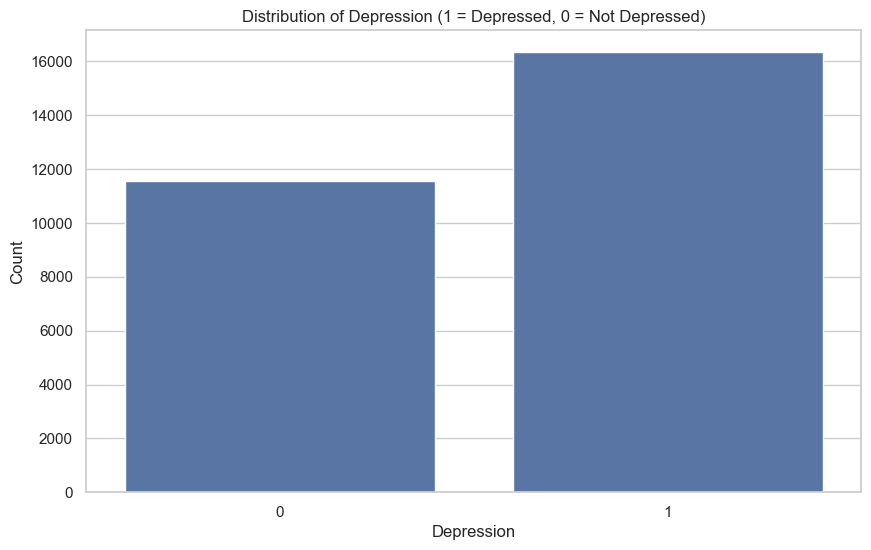

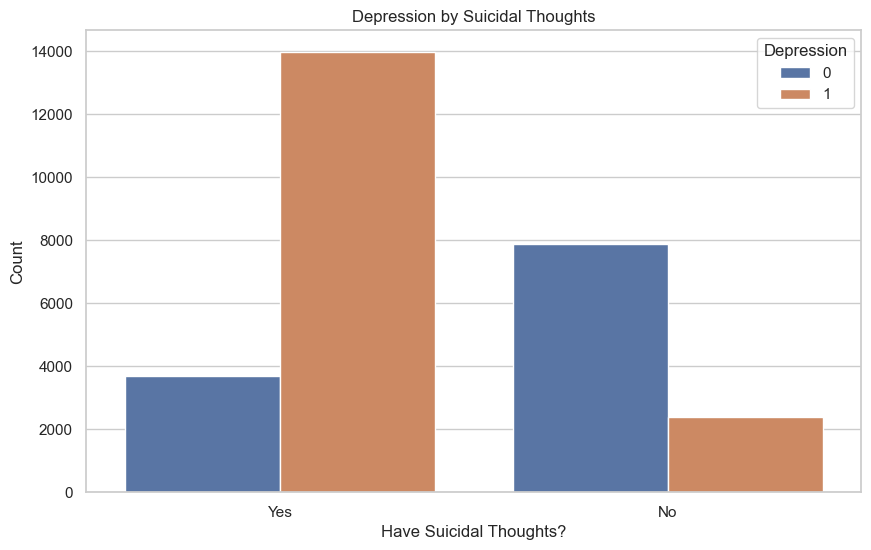

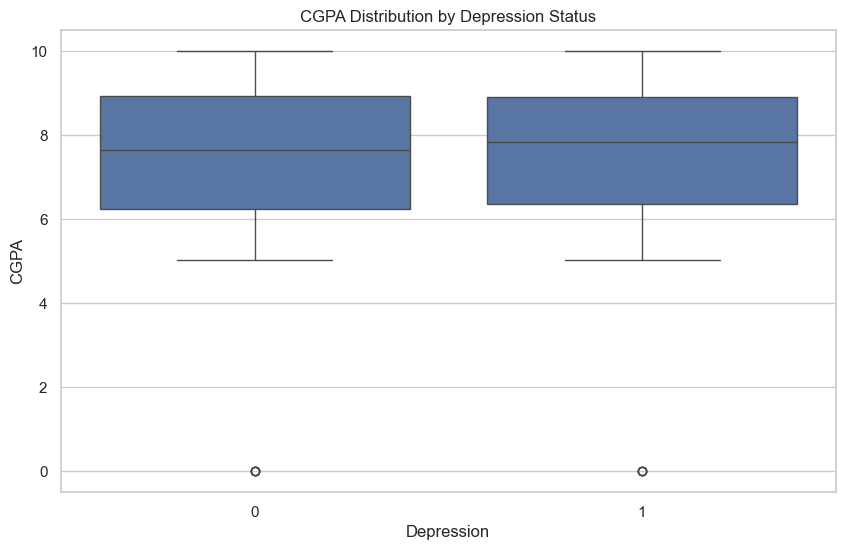

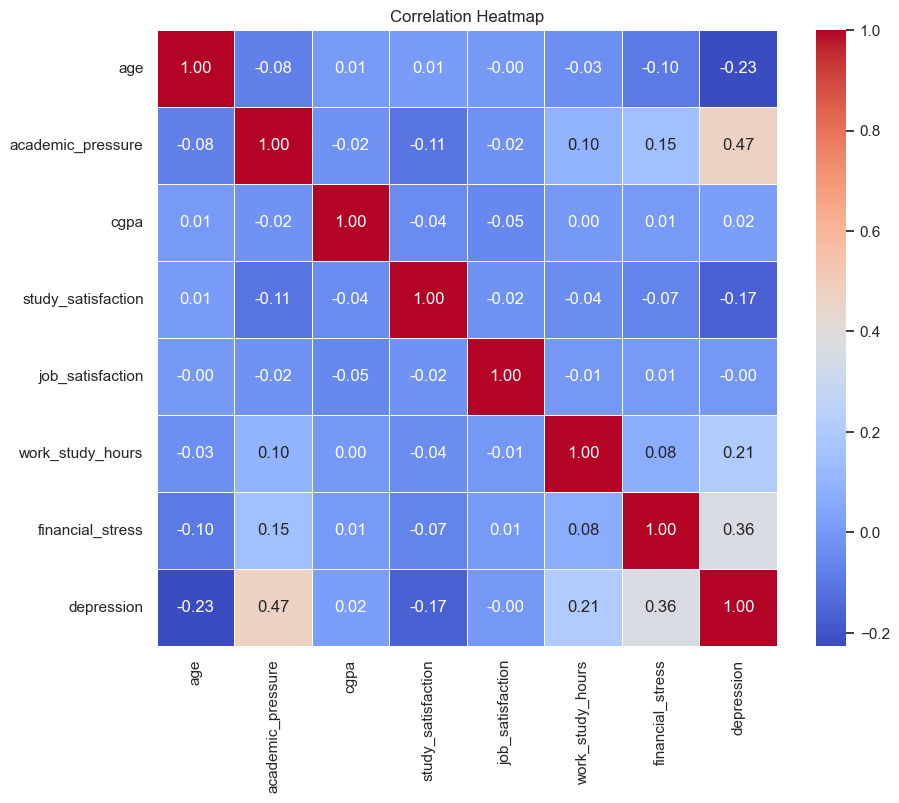

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Depression Count Plot
sns.countplot(data=df, x='depression')
plt.title("Distribution of Depression (1 = Depressed, 0 = Not Depressed)")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.show()

# Depression vs Suicidal Thoughts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='have_you_ever_had_suicidal_thoughts_?', hue='depression')
plt.title("Depression by Suicidal Thoughts")
plt.xlabel("Have Suicidal Thoughts?")
plt.ylabel("Count")
plt.legend(title="Depression")
plt.show()

# CGPA vs Depression
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='depression', y='cgpa')
plt.title("CGPA Distribution by Depression Status")
plt.xlabel("Depression")
plt.ylabel("CGPA")
plt.show()

# Heatmap of Correlations 

df.replace('?', np.nan, inplace=True)
plt.figure(figsize=(10, 8))

numerical_cols = ['age', 'academic_pressure', 'cgpa', 'study_satisfaction',
                  'job_satisfaction', 'work_study_hours', 'financial_stress', 'depression']


corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering (you can tweak this list)
features = ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'work_study_hours', 'financial_stress']

# Drop rows with missing values in those columns
cluster_data = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataframe
df.loc[cluster_data.index, 'cluster'] = kmeans.labels_


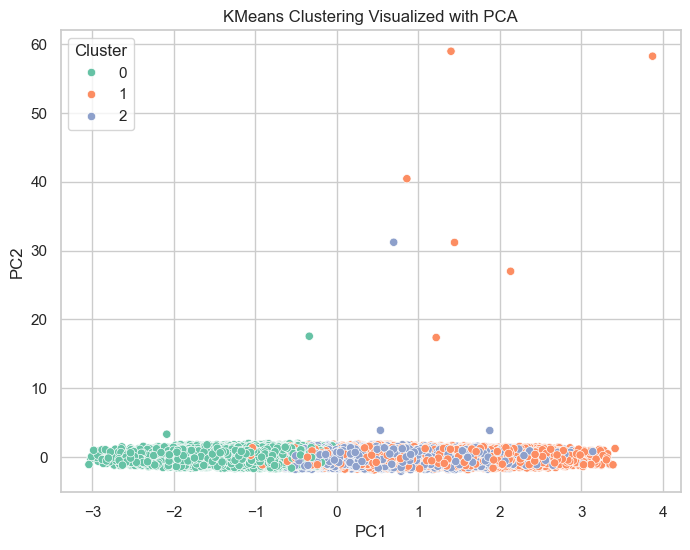

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualisation
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('KMeans Clustering Visualized with PCA')
plt.show()


In [37]:
import statsmodels.api as sm

# Drop NA rows for regression
reg_data = df[['academic_pressure', 'depression']].dropna()

# Define X and y
X = reg_data[['academic_pressure']]
X = sm.add_constant(X)  # Adds intercept
y = reg_data['depression']

# Fit model
model = sm.Logit(y, X)
result = model.fit()

# Summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.557124
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             depression   No. Observations:                27901
Model:                          Logit   Df Residuals:                    27899
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:                  0.1788
Time:                        13:42:10   Log-Likelihood:                -15544.
converged:                       True   LL-Null:                       -18930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1344      0.036    -59.267      0.000      -2.205      -2.064
academic